# **Você pagou a fatura?**
#### Uma análise sobre inadimplencia de correntistas



---



**Aluno**: Leandro Ferreira


---



# **1. INTRODUÇÃO**

---




Baseado nos dados dos cliente de uma instituição bancaria, este ensaio procura obter uma possível explicação do **Por que clientes deixam de honrar com suas dívidas junto ao banco?** As variáveis que talvez nos garantam explicações independentes são de ordem discreta/numérica e categórica. Este ensaio é composto por 4 sessões. A primeira apresenta a exploração dos dados utilizando o Pandas. A segunda apresenta as transformações e limpeza realizadas na df para garantir a concisão dos dados. A terceira apresenta as visualizações mais interessantes. A quarta e última apresentam os insights com uma breve análise e proposta de resposta a pergunta que já de antemão foi apresentada.


Foram utilizados diferentes pacotes para trabalhar na linguagem Python. São eles:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Os dados foram carregados e foram visualizadas as 10 primeiras linhas da dataframe, a partir do seguinte código da biblioteca Pandas:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head(10)

Na df, a coluna nomeada 'default' apresenta nossa variável dependente.




##**2. EXPLORAÇÃO DOS DADOS**

---






Nesta sessão serão realizadas asexplorações que dizem respeito à estrutura e Schema dos dados. As linhas de código usadas, são encontradas a seguir.


##**2.1 Estrutura dos dados**

Nesta sessão, observaremos quais informaçãoesestruturais como quantidade de linhas e colunas e a proporção

In [ ]:
df.shape

(10127, 16)

Nossa intenção é observar a coluna 'default', na qual são apresentados os padrões de adimplencia e inadimplência, identificados como int 0 e 1 respectivamente.

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Observa-se que os dados estão desbalanceados, uma vez que o número de adimplentes é maior que o dos inadimplentes. **Insight 1:** Isto é algo positivo, pois indica que o banco pode continuar fornecendo crédito e que a maioria de seus correntistas honrará á dívida.

##**2.2 Schema**

Nesta seção, identificamos a distribuição da proporção dos atributos de cada um dos tipos de variáveis. Identificamos as int, float e str que podem compor cada uma das colunas e se, de fato, estes tipos de variáveis fazem sentido junto ao que se pretende identificar como atributos categórico ou numéricos.
Aqui retomamos o conceito dos tipos de variáveis da estatística quantitativas ou qualitativas. As variáveis quantitativas podem ser observadas a partir do que aqui se chama atributos numéricos, contendo `ints` ou `floats`. Já as variáveis qualitativas são chamadas de categoricas e identificadas por `str` ou `object` (este último, especificamente no Pandas).

As linhas de código são apresentadas abaixo.

In [ ]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [ ]:
df.dtypes #visualizamos os tipos de variáveis de cada coluna da df

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [ ]:
df.select_dtypes('object').describe().transpose() # identificamos os atributos categóricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


As colunas `limite_credito` e `valo_transacoes_12m` parecem não fazer muito sentido serem variáveis categóricas. Portanto, parece ser necessário uma transformação de `object` para `float`. Isto será feito na próxima seção de transformação.

As colunas `escolaridade, estado_civil `e ` salario_anual` parecem possuir alguma inconsistencia.

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() #identificamos os atributos numéricos

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Nesta última tabela, todo os dados parecem fazer sentido no tipo de variável e o que se pretende observar. **Insight 2** Interessante observar que os meses de relacionamento com o banco tem uma variação entre 28% e 42%, o que indica que uma quantidade significativa de correntistas inadimplentes tem uma relação de até 4 anos com o banco.

## **2.3 Na e dados faltantes**

Aqui, identificamos os dados faltantes identificados por Na ou NaN ou demais siglas. Nesta etapa, talvez seja necessário identificar de fato em quais colunas faltam dados.

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Foi identificado que as colunas `escolaridade, estado_civil` e `salartio_anual` por obterem como resposta `TRUE`, possuem dados faltantes. O que já se suspeitava. Para identificar frequencia de dados faltantes, foi desenvolvida a função abaixo.

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=df)


{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [ ]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [ ]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Como nossa intenção é identificar a coluna **'default'** que indica a inadimplencia ou o não, fez sentido identificarmos os dados faltantes correlacionados com esta variável. O que se observou, é que:


1.   A frequência de dados para `escolaridade` nos três resultados observados tem baixa variação. Chegando a um max de 0.8. O que pode indicar que estas linhas podem ser eliminadas sem causar grandes danos ao conjunto total e as análises posteriores.
2.   A frequência de dados para `estado_civil`, nos três resultados, também tem baixa variação com max de 0.5, o que indica a mesma situação de antes.
3.   Por fim, a frequencia em `salario_anual` também observa-se baixa variação de max 0.5. o que também indica a mesma situação.



Passemos para a sessão de transformação e limpeza.

# **3. DATA WRANGLING**

---



Conduziremos os processos de limpeza e modificações necessárias

## **3. Correção do Schema**

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

Aqui alteramos os tipos de variáveis das colunas `limite_credito` e `valor_transacoes_12m`, para numéricas. Criamos uma função `lambda` para garantir a limpeza dos dados. Antes executamos um teste.

In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", ".")) # função lambda para limpeza


In [ ]:
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Observou-se que de fato as alterações ocorreram. Agora, aplicaremos nas colunas indicadas para que os valores se tornem `floats`.

In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [ ]:
df.select_dtypes('object').describe().transpose() # checamos se de fato as alterações ocorreram nos atributos categóricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() # o mesmo é feito para os atributos numéricos

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


As alterações foram realizadas com sucesso. Passemos a rmeoção de Na.

## **3.2 Remoção de Na**

A remoção é algo simples de ser realizado a partir do código a seguir.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 0].shape

(5968, 16)

In [ ]:
df[df['default'] == 1].shape # A soma de ambas linhas dá exatamente 7081, o que garante que os Na foram removidos e a df parece estar homogeneizada

(1113, 16)

In [ ]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


A variações entre as novas e originais proporções são pequenas, o que nos dá a ideia que não foram eliminados dados essenciais. 

Todo processo de parsing pode trazer a eliminação de dados relevantes. Na medida em que trabalha-se com uma df com mais de 7 mil linhas, fica impossível checar linha a linha sem o olho nu se perder. Portanto, estas ferramentas garantem a melhor aproximação de um resultado satisfatório de uma df homogeneizada e concisa.

# **4. VISUALIZAÇÃO DE DADOS**

---



Após concluirmos as etapas fundamentais de transoformação e eliminação de dados que porventura atraplhassem as análises, passamos par a etapa de visualização dos dados. 
Selecionamos para esta etapa, somente as visualizações que de fato nos auxiliam a identificar prováveis correlações entre os atributos 'default' e os demais. Sejam eles numéricos ou categóricos.
A partir daqui, mobilizamos os pacotes seaborn e matplotlib para nos auxiliar numa visualização satisfatória. Seguem as linhas de códigos.

In [ ]:
sns.set_style("whitegrid")

In [ ]:
df_adimplente = df[df['default'] == 0]

In [ ]:
df_inadimplente = df[df['default'] == 1]

In [ ]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Após rodar atributos categóricas com relação a contagem de incidência de cada categoria de uma variável. Verificou-se que estas não apontam para conclusões que podem trazer insisghts valiosos. **Insight 3** isto por si só se apresenta enquanto um insight valioso. Significa que as variáveis `escolaridade, estado_civil, salario_anual` e `tipo_cartao` apresentam pouca ou nenhum relevancia no comportamento inadimplente dos correntistas do banco. Para não estender este notebook, optamos por não apresentar estas linhas de código ou mesmo os gráficos referentes. Seguimos para os atributos numéricas.

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


*   Quantidade de transações nos últimos 12 meses



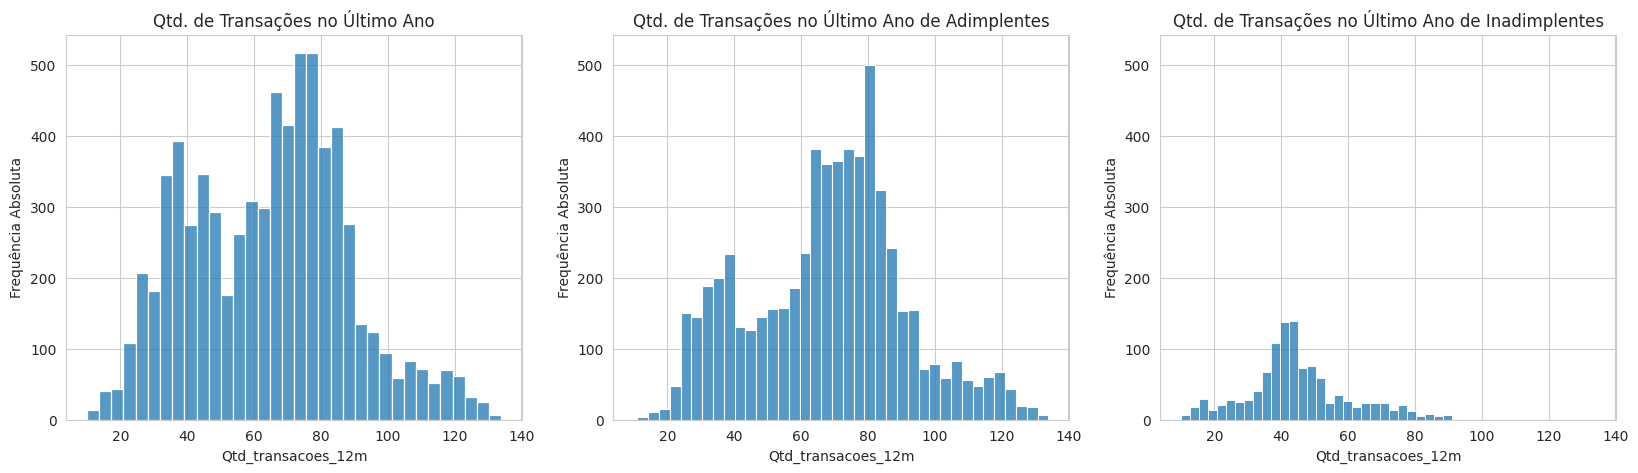

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Valor das Transações nos Últimos 12 Meses

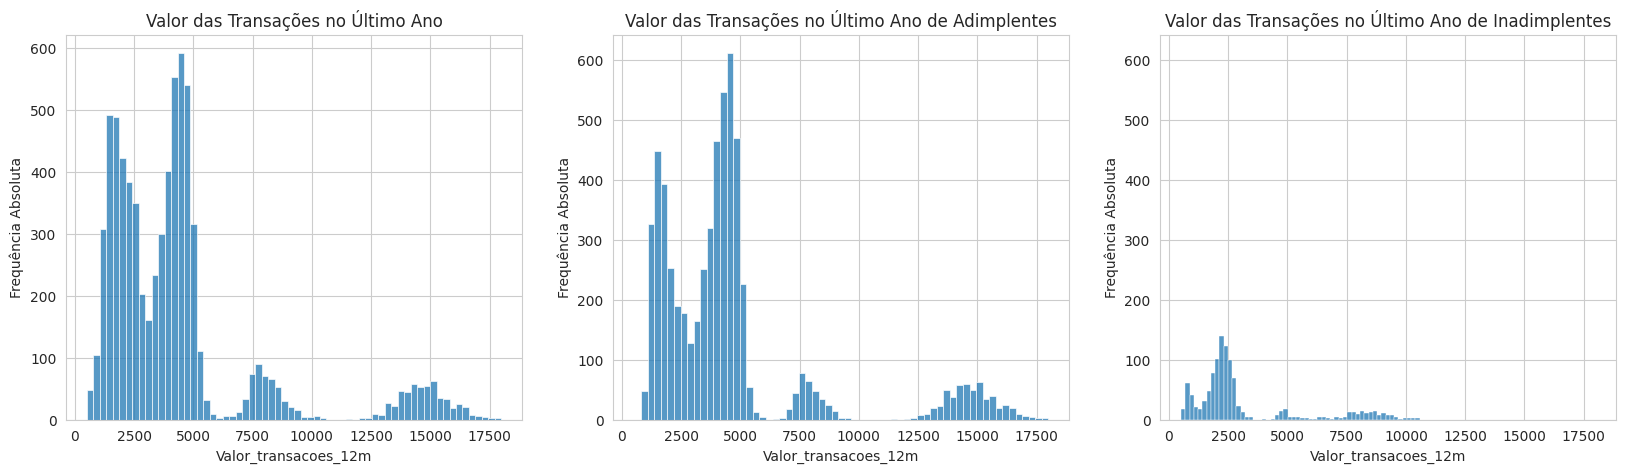

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Após visualizar todos os gráfico e alterando somente a variável independente, foi possível observar que os únicos atributos que têm alguma correlação e causalidade com a inadimplência dos clientes são: *Valor das Transações nos Últimos 12 Meses* e *Quantidade de transações nos últimos 12 meses*. 

Portanto, como forma de identificar melhor a correlação entre estes atributos, foi plotado um gráfico de pontos a partir do código que segue abaixo.

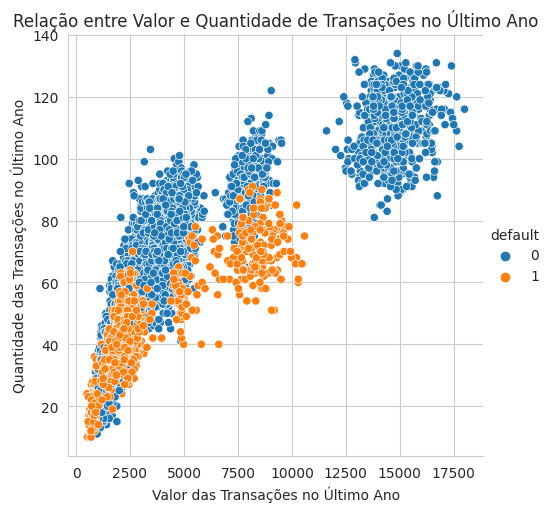

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )
f.get_figure().savefig(f"{argv[1]}.png")

# **5. INSIGHTS**

---



A partir da análise dos dados e da visualização dos mesmos, foi possível gerar alguns insights e considerações que nos ajudam a responder a pergunta: **Por que clientes deixam de honrar com suas dívidas junto ao banco?**.


**1**  O fato de o número de inadimplentes ser menor que o de adimplentes é algo positivo para a instituição financeira.Isto indica que o banco pode continuar a fornecer crédito e que a maioria de seus correntistas honrará á dívida.

**2** Interessante observar que os meses de relacionamento com o banco tem uma variação entre 28% e 42%, o que indica que uma quantidade significativa de correntistas inadimplentes tem uma relação de até 4 anos com o banco. Os dados parecem apontar para uma banco jovem e que tem atraído, em alguma medida, a atenção de clientes.

**3** As variáveis escolaridade, estado civil, salario anual e tipo de cartao apresentam pouca ou nenhum relevancia no comportamento inadimplente dos correntistas do banco. Com todas elas apresentando valores muito superiores para a classe de adimplentes.

**4** A variável Quantidade de transações nos últimos 12 meses, como observado no gráfico, sugere que a inadimplencia ocorre dentro de 20 até 60 transações. O pico do gráfico de inadimplencia não acompanha a tendência orgânica dos dados. Por sua vez, isto sugere que o banco precisa atentar-se para clientes com baixas transações ao longo de 12 meses

**5** A variável Valor das Transações nos Últimos 12 Meses sugere que a inadimplencia ocorre em transações de valores entre 0 e 5000. O que pode sugerir uma atenção maior para clientes que realizam este tipo de transaçao ao longo do ano.

**6** De acordo com gráfico de pontos, onde cruzamos ambas variáveis e 0 refere-se a adimplencia e 1 a inadimplência, é possível identificar 4 principais agrupamentos:
1. O primeiro grupo é composto exclusivamente por adimplentes e se localiza na interseção entre os valores mais altos e as maiores quantidades. Ao que tudo indica, estes clientes parecem não ter problemas para honrar com suas dívidas. Portanto, é sempre possível garantir que uma eventual solicitação de aumento seja atendida de maneira mais tranquila e sem tantas análises.
2. O segundo grupo se localiza mais ao centro do gráfico. Na interseção entre 80 transações e 7500 em valor. Este grupo parece ser composto majoritariamente por clientes que honram com suas dívidas ao longo dos anos. Mas é possível observar uma diferença. ACima de 80 transações concentram-se os clientes com perfil adimplente. Já abaixo de 80 transações, o perfil de inadimplencia aponta para a hipótese que, quanto menor a quantidade das transações, ainda que de um mesmo valor, menor a probabilidade de adimplencia, seriam necessários mais estudos para investigar melhor este perfil da interseção 80x7500.
3. Um terceiro grupo seria composto também por adimplentes e inadimplentes. há uma variação maior em quantidade e valor, mas eles estão abaixo de 80 e abaixo de 6000 respectivamente. O gráfico sugere que este grupo é o maior de todos e concentra a maior quantidade de clientes do banco, portanto, requer uma atenção mais profunda. Mas importante ressaltar a concentração de inadimplentes num valor inferior a 4500.
4. O quarto grupo seria um subgrupo do 3. Isto por que ele compõe a massa de inadimplencia e adimplencia mas se diferencia pela concentração de inadimplentes com poucas transações e com valores inferiores. Como medida para garantir que o crédito seja concedido a estes clientes, seria interessante o reforço de política que demonstrem a necessidade de auemntar o relacionamento com o banco em termos de transações ao longo do ano. Ou mesmo oferecer linhas de crédito mais restritas e com possibilidade de aumento a depender da profundidade do relacionamento do cliente com o banco.